# Handling Missing Values Categorical and Numerical-

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('nan.csv')

### Numerical data

In [4]:
df

,top,high
0,41.0,88.0
1,22.0,NaN
2,45.0,NaN
3,36.0,NaN
4,NaN,NaN
5,21.0,NaN
6,12.0,NaN


In [5]:
df['top'].dropna()

0    41.0
1    22.0
2    45.0
3    36.0
5    21.0
6    12.0
Name: top, dtype: float64

In [6]:
df1 = df.copy()

In [7]:
df.isnull().sum()

top     1
high    6
dtype: int64

In [8]:
df.shape

(7, 2)

In [9]:
# 1-- Percentage
df.isnull().sum()/df.shape[0]

top     0.142857
high    0.857143
dtype: float64

In [10]:
# 2-- Percentage
df.isnull().mean()

top     0.142857
high    0.857143
dtype: float64

In [11]:
# drop Column 'high'
df.drop(['high'] , axis=1, inplace=True)

In [12]:
df

,top
0,41.0
1,22.0
2,45.0
3,36.0
4,NaN
5,21.0
6,12.0


In [13]:
df['top'].dropna(inplace=True)  # delete all null values

In [14]:
df

,top
0,41.0
1,22.0
2,45.0
3,36.0
4,NaN
5,21.0
6,12.0


In [15]:
# fill missing value
df1['top'] = df1['top'].fillna(df1['top'].mean())

In [16]:
df1

,top,high
0,41.0,88.0
1,22.0,NaN
2,45.0,NaN
3,36.0,NaN
4,29.5,NaN
5,21.0,NaN
6,12.0,NaN


In [17]:
df = pd.read_csv('nan2.csv')

In [18]:
df

,top,high
0,41.0,88.0
1,22.0,NaN
2,45.0,NaN
3,36.0,NaN
4,NaN,NaN
5,21.0,NaN
6,1254.0,NaN


In [19]:
# mean is not suitable to fit it b/c of outlier
df['top'].fillna(df['top'].mean())

0      41.0
1      22.0
2      45.0
3      36.0
4     236.5
5      21.0
6    1254.0
Name: top, dtype: float64

In [20]:
# apply median
df['top'].fillna(df['top'].median())

0      41.0
1      22.0
2      45.0
3      36.0
4      38.5
5      21.0
6    1254.0
Name: top, dtype: float64

In [21]:
df = pd.read_csv('nan3.csv')

In [22]:
df

,top,high
0,4.0,88.0
1,5.0,NaN
2,5.0,NaN
3,4.0,NaN
4,NaN,NaN
5,4.0,NaN
6,2.0,NaN


In [23]:
df['top'].value_counts()

4.0    3
5.0    2
2.0    1
Name: top, dtype: int64

In [24]:
# fix by mode by interpolate() function
df.interpolate()

,top,high
0,4.0,88.0
1,5.0,88.0
2,5.0,88.0
3,4.0,88.0
4,4.0,88.0
5,4.0,88.0
6,2.0,88.0


In [25]:
df

,top,high
0,4.0,88.0
1,5.0,NaN
2,5.0,NaN
3,4.0,NaN
4,NaN,NaN
5,4.0,NaN
6,2.0,NaN


### Categorical data

In [26]:
df = pd.read_csv('spam.csv')

In [27]:
df

,email,hacker
0,spam,1
1,no spam,0
2,spam,1
3,NaN,1
4,no spam,0
5,no spam,0
6,no spam,0


In [28]:
df['email'].value_counts()

no spam    4
spam       2
Name: email, dtype: int64

In [29]:
# ffill === forward fill
df['email'].fillna(method= 'ffill')

0      spam 
1    no spam
2      spam 
3      spam 
4    no spam
5    no spam
6    no spam
Name: email, dtype: object

In [30]:
# bfill === backward fill
df['email'].fillna(method= 'bfill')

0      spam 
1    no spam
2      spam 
3    no spam
4    no spam
5    no spam
6    no spam
Name: email, dtype: object

In [31]:
# manually fill
df['email'].fillna('no spamming', inplace=True)

In [32]:
df

,email,hacker
0,spam,1
1,no spam,0
2,spam,1
3,no spamming,1
4,no spam,0
5,no spam,0
6,no spam,0


# Handling Strings-Removing Special Characters-

In [33]:
df = pd.read_csv('SP.csv')

In [34]:
df1 = df.copy()

In [35]:
df

,school,score
0,"asdi""",32as
1,[dsd],dd44
2,[bds],ak1


In [36]:
# Handle Special Character
character = ['"', '[', ']']
for char in character:
    df['school'] = df['school'].str.replace(char, '')

<ipython-input-36-9a7586d60354>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['school'] = df['school'].str.replace(char, '')


In [37]:
df

,school,score
0,asdi,32as
1,dsd,dd44
2,bds,ak1


In [38]:
character = ['as', 'dd', 'ak']
for char in character:
    df['score'] = df['score'].str.replace(char, '')

In [39]:
df

,school,score
0,asdi,32
1,dsd,44
2,bds,1


In [40]:
df1

,school,score
0,"asdi""",32as
1,[dsd],dd44
2,[bds],ak1


In [41]:
# remove number in string
df1['score'] = df1['score'].str.replace('\d+', '')

<ipython-input-41-9a789fd04427>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['score'] = df1['score'].str.replace('\d+', '')


In [42]:
character = ['"', '[', ']']
for char in character:
    df1['school'] = df1['school'].str.replace(char, '')

<ipython-input-42-745606dcecc1>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df1['school'] = df1['school'].str.replace(char, '')


In [43]:
df1

,school,score
0,asdi,as
1,dsd,dd
2,bds,ak


In [44]:
df = pd.read_csv('object.csv')

In [45]:
df

,id,age
0,410,45
1,541,11
2,487,25
3,555,33
4,111,47
5,123,raja
6,548,14
7,541,30
8,254,22
9,985,47


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      43 non-null     object
 1   age     43 non-null     object
dtypes: object(2)
memory usage: 816.0+ bytes


In [47]:
df['id'].unique()

array(['410', '541', '487', '555', '111', '123', '548', '254', '985',
       '222', '-'], dtype=object)

In [48]:
(df['id'] == '-').sum()

2

In [49]:
df['age'].unique()

array(['45', '11', '25', '33', '47', 'raja', '14', '30', '22', '58',
       'rani'], dtype=object)

In [50]:
(df['age'] == 'raja').sum()

3

In [51]:
(df['age'] == 'rani').sum()

2

In [52]:
# change object to float
df['id'] = df['id'].apply(pd.to_numeric, errors='coerce')   # delete '-' & replace by NaN

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      41 non-null     float64
 1   age     43 non-null     object 
dtypes: float64(1), object(1)
memory usage: 816.0+ bytes


In [54]:
df['id'].isnull().sum()

2

In [55]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      41 non-null     float64
 1   age     38 non-null     float64
dtypes: float64(2)
memory usage: 816.0 bytes


In [57]:
df['age'].isnull().sum()

5

In [58]:
# Percentage 
df.isnull().sum()/df.shape[0]

id     0.046512
age    0.116279
dtype: float64

In [59]:
df.isnull().mean()

id     0.046512
age    0.116279
dtype: float64

# Handling Outlier Using Percentile

In [60]:
df = pd.read_csv('age.csv')

In [61]:
df

,age,hight
0,56,14
1,2,40
2,3,42
3,45,38
4,49,44
5,48,51
6,47,14
7,51,40
8,55,42
9,54,38


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='age'>

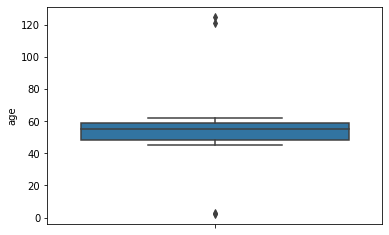

In [63]:
# By boxplot to view OUTLIER
sns.boxplot(y='age', data=df)

(array([2., 0., 0., 0., 0., 0., 1., 5., 6., 5., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 2.]),
 array([  2.  ,   8.15,  14.3 ,  20.45,  26.6 ,  32.75,  38.9 ,  45.05,
         51.2 ,  57.35,  63.5 ,  69.65,  75.8 ,  81.95,  88.1 ,  94.25,
        100.4 , 106.55, 112.7 , 118.85, 125.  ]),
 <BarContainer object of 20 artists>)

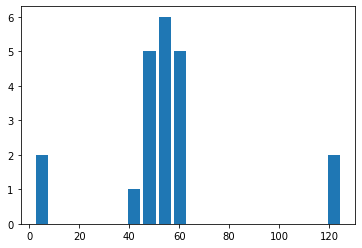

In [64]:
# by Histogram
plt.hist(df['age'], bins=20, rwidth=0.8)

In [65]:
df.age.describe()

count     21.000000
mean      55.619048
std       27.597964
min        2.000000
25%       48.000000
50%       55.000000
75%       59.000000
max      125.000000
Name: age, dtype: float64

In [66]:
df.age.quantile(0.06)

11.399999999999999

In [67]:
# below 6% all the values are min outlier
min_outlier = df.age.quantile(0.06)

In [68]:
df.age.quantile(0.93)

97.40000000000009

In [69]:
# above 93% all the values are max outlier
max_outlier = df.age.quantile(0.93)

In [70]:
# Removing Outlier
df.loc[df.age < min_outlier, 'age'] = np.nan
df.loc[df.age > max_outlier, 'age'] = np.nan

In [71]:
df

,age,hight
0,56.0,14
1,NaN,40
2,NaN,42
3,45.0,38
4,49.0,44
5,48.0,51
6,47.0,14
7,51.0,40
8,55.0,42
9,54.0,38


In [72]:
df['age'].fillna(round(df['age'].mean()), inplace=True)
# df['age'] = df['age'].fillna(df['age'].mean()).round(0)

In [73]:
df

,age,hight
0,56.0,14
1,54.0,40
2,54.0,42
3,45.0,38
4,49.0,44
5,48.0,51
6,47.0,14
7,51.0,40
8,55.0,42
9,54.0,38


<AxesSubplot:>

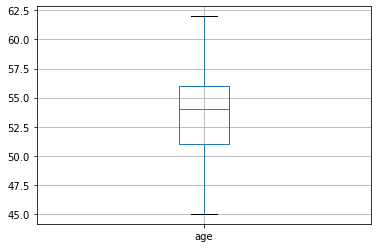

In [74]:
df.boxplot(column=['age'])

<AxesSubplot:>

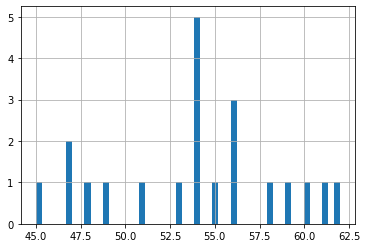

In [75]:
df.age.hist(bins=50)